In [16]:
!pip install scipy

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.6/37.6 MB 55.9 MB/s eta 0:00:0000:0100:01


In [17]:
#initial import of relevant packages for graphing
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import ScalarFormatter
from matplotlib.ticker import FuncFormatter
#https://stackoverflow.com/questions/32085531/importing-a-csv-file-into-python-to-make-scatterplots-and-histograms

In [18]:
#read in the data
df = pd.read_csv("1-17-25_agonist_as_antagonist_plate_all_drugs_data_for_plot.csv", index_col=0)  # Set the first column as row index

In [19]:
df

,OxA,Suvorexant,DMSO,Z5052318887,PV-006669822259,Z2017261328,Z1679037537,PV-006693400816,PV-006634533361,PV-006687433267,...,PV-006621251098,PV-006688879098,PV-006706116130,PV-006544139142,PV-006710095262,PV-006655328768,PV-006666022285,PV-006612138035,PV-006668031637,Z1316825222
Treatment,,,,,,,,,,,,,,,,,,,,,
Replicate 1,409560,3880,52600,176400,22160,123000,130160,128680,329600,82880,...,23000,75440,279480,101120,51080,171680,55720,134240,133240,91120
Replicate 2,163800,2160,68640,213600,122960,48920,285040,273200,368760,132760,...,188120,97840,143360,204120,32520,56400,208880,90120,49440,77440
Replicate 3,260320,2680,65240,239760,170880,231080,79400,399480,373720,156880,...,27920,115880,203800,119680,56560,130400,149320,96520,145720,61880
Replicate 4,262760,2240,79400,76920,142240,174600,64600,148120,129080,153040,...,43920,47360,120560,95160,45240,87200,144360,150640,64400,82760


In [20]:
#get mean and std dev
column_means = df.mean(axis=0)  # Mean of each column
column_stds = df.std(axis=0)    # Standard deviation of each column

/tmp/ipykernel_874248/820272114.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


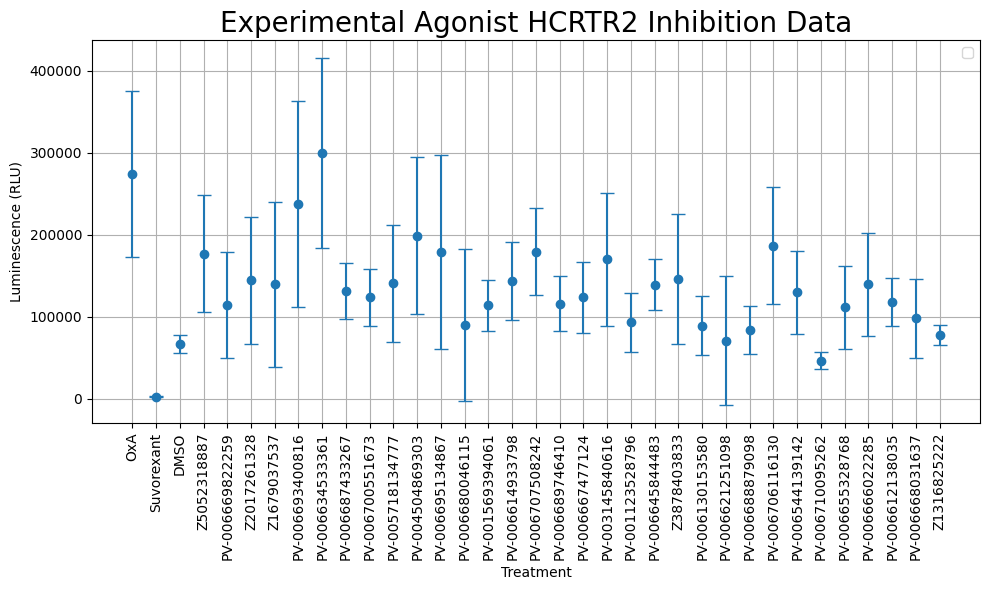

In [21]:
#make plot


plt.figure(figsize=(10, 6))
plt.errorbar(column_means.index, column_means, yerr=column_stds, fmt='o', capsize=5)

# Customizing the plot
plt.title('Experimental Agonist HCRTR2 Inhibition Data', fontsize=20)
plt.xlabel('Treatment')
plt.ylabel('Luminescence (RLU)')
plt.xticks(rotation=90)  # Rotate x-axis labels if needed
plt.grid(True)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
drug_data = df.transpose()
# Drop the row for the drug named "Suvorexant"
drug_data = drug_data.drop("Suvorexant", axis=0)
drug_data

Treatment,Replicate 1,Replicate 2,Replicate 3,Replicate 4
OxA,409560,163800,260320,262760
DMSO,52600,68640,65240,79400
Z5052318887,176400,213600,239760,76920
PV-006669822259,22160,122960,170880,142240
Z2017261328,123000,48920,231080,174600
Z1679037537,130160,285040,79400,64600
PV-006693400816,128680,273200,399480,148120
PV-006634533361,329600,368760,373720,129080
PV-006687433267,82880,132760,156880,153040
PV-006700551673,138080,112960,162880,80560


/tmp/ipykernel_874248/4083017220.py:31: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  [i], drug_means[i], yerr=drug_sems[i], fmt="o", label=drug, capsize=5, markersize=8, color=color
/tmp/ipykernel_874248/4083017220.py:38: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  i, drug_means[i] + drug_sems[i], "*", ha="center", va="bottom", fontsize=14, color="black"


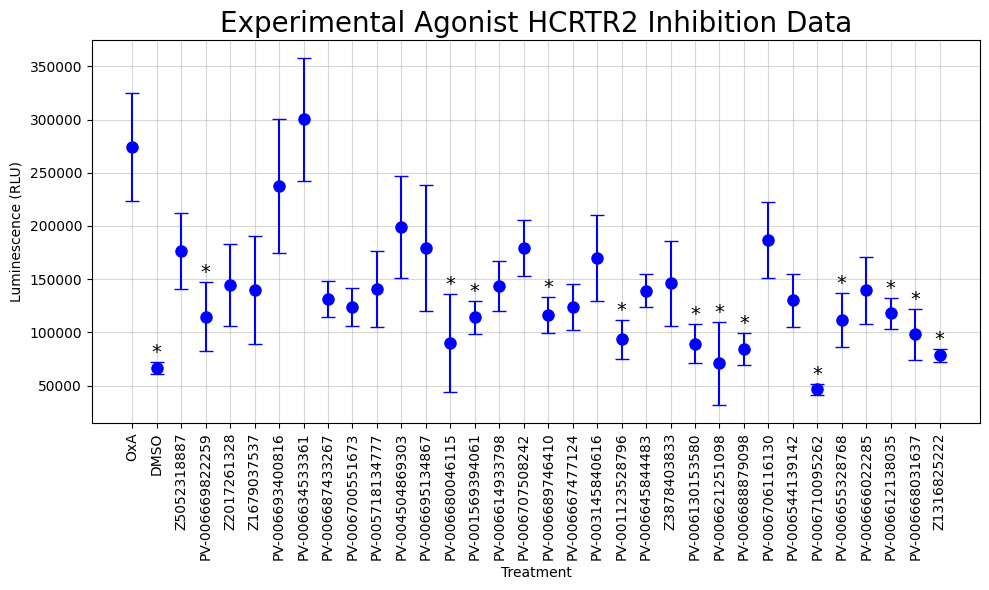

In [23]:
# Extract drug names from the index (row headers)
drug_names = drug_data.index  # Drug names are now the row index
replicates = drug_data  # Replicates are the rest of the data (without the row names)

# Step 2: Calculate mean and standard error for each drug
drug_means = replicates.mean(axis=1)  # Mean across replicates (rows for each drug)
drug_sems = replicates.sem(axis=1)  # Standard error across replicates (rows for each drug)

# Step 3: Perform statistical analysis (t-test against the first drug)
# The first drug is now the first row in the data (first index)
first_drug_values = replicates.iloc[0, :]  # First drug's replicates

# Store p-values for the comparisons
p_values = []

for i, drug in enumerate(drug_names):
    # Compare each drug's data with the first drug using a t-test
    drug_values = replicates.iloc[i, :]  # Data for the current drug
    _, p_value = stats.ttest_ind(first_drug_values, drug_values, equal_var=False)  # Welch's t-test
    p_values.append(p_value)

# Step 4: Plot the data with error bars
plt.figure(figsize=(10, 6))

# Specify a color for all data points (e.g., 'blue')
color = 'blue'

# Plot the drugs with error bars and set all data points to the same color
for i, drug in enumerate(drug_names):
    plt.errorbar(
        [i], drug_means[i], yerr=drug_sems[i], fmt="o", label=drug, capsize=5, markersize=8, color=color
    )

# Add asterisks for statistical significance
for i, p_value in enumerate(p_values):
    if p_value < 0.05:
        plt.text(
            i, drug_means[i] + drug_sems[i], "*", ha="center", va="bottom", fontsize=14, color="black"
        )

# Customize the plot
plt.title('Experimental Agonist HCRTR2 Inhibition Data', fontsize=20)
plt.xlabel('Treatment')
plt.ylabel('Luminescence (RLU)')
plt.xticks(np.arange(len(drug_names)), drug_names, rotation=90, ha="center")
plt.grid(alpha=0.5)
plt.tight_layout()

# Show the plot
plt.show()